In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [43]:
df = pd.read_csv("booking.csv")
df = df.drop(["Booking_ID","P-C", "P-not-C", "date of reservation"], axis=1)
# pd.to_datetime(df['date of reservation'], format='%m/%d/%Y', errors='coerce')
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,77.00,0,Canceled


In [44]:
df.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated',
       'average price', 'special requests', 'booking status'],
      dtype='object')

In [45]:
label_encoder = LabelEncoder()

df['type of meal'] = label_encoder.fit_transform(df['type of meal'])

df['room type'] = label_encoder.fit_transform(df['room type'])

df['market segment type'] = label_encoder.fit_transform(df['market segment type'])

df['booking status'] = label_encoder.fit_transform(df['booking status'])

In [46]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status
0,1,1,2,5,0,0,0,224,3,0,88.00,0,1
1,1,0,1,3,3,0,0,5,4,0,106.68,1,1
2,2,1,1,3,0,0,0,1,4,0,50.00,0,0
3,1,0,0,2,0,0,0,211,4,0,100.00,1,0
4,1,0,1,2,3,0,0,48,4,0,77.00,0,0


Type of Meal: ['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'] = [0, 3, 1, 2]<br>
Room Type   : ['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',  'Room_Type 5', 'Room_Type 7', 'Room_Type 3' = [0, 3, 1, 5, 4, 6, 2]<br>
Market Seg Type: ['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'] = [3, 4, 2, 0, 1]<br>
Booking Status: ['Not_Canceled', 'Canceled'] = [1, 0]]

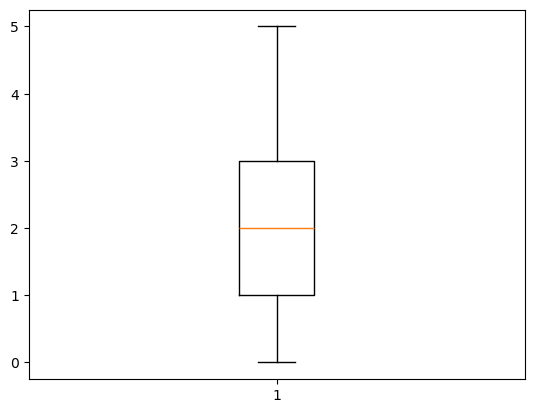

In [47]:
q1=df['number of week nights'].quantile(0.25)
q3=df['number of week nights'].quantile(0.75)

iqr=q3-q1

uw=q3+1.5*iqr
lw=q1-1.5*iqr

plt.boxplot(df["number of week nights"][(df["number of week nights"]>lw)&(df["number of week nights"]<uw)])
plt.show()

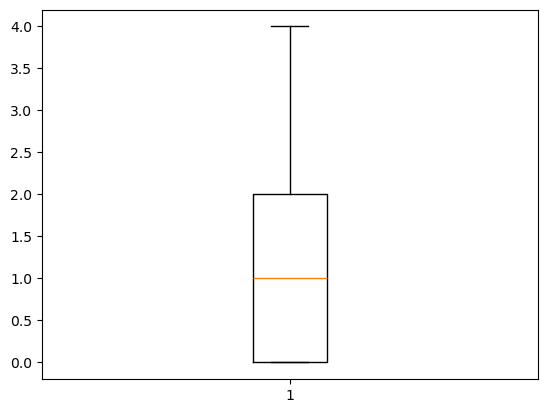

In [48]:
q1=df['number of weekend nights'].quantile(0.25)
q3=df['number of weekend nights'].quantile(0.75)

iqr=q3-q1

uw=q3+1.5*iqr
lw=q1-1.5*iqr

plt.boxplot(df["number of weekend nights"][(df["number of weekend nights"]>lw)&(df["number of weekend nights"]<uw)])
plt.show()

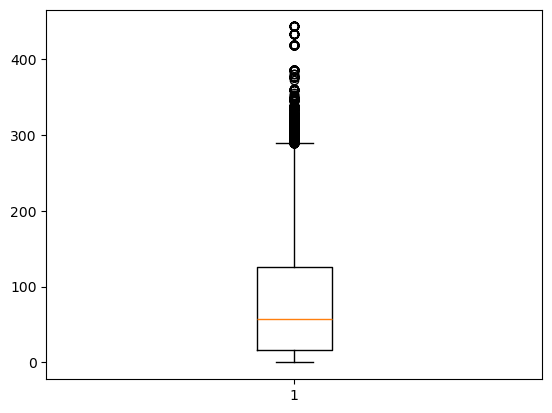

In [49]:
q1=df['lead time'].quantile(0.25)
q3=df['lead time'].quantile(0.75)

iqr=q3-q1

uw=q3+1.5*iqr
lw=q1-1.5*iqr

plt.boxplot(df["lead time"][(df["lead time"]>lw)&(df["type of meal"]<uw)])
plt.show()

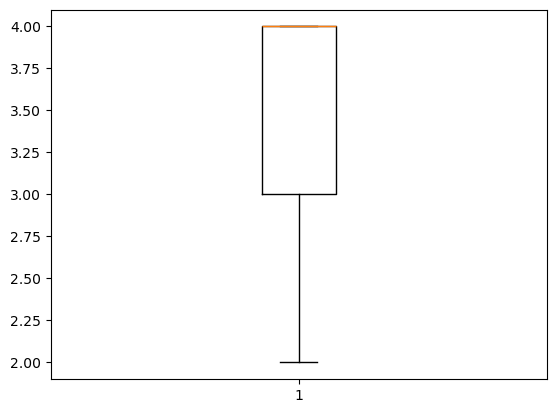

In [50]:
q1=df['market segment type'].quantile(0.25)
q3=df['market segment type'].quantile(0.75)

iqr=q3-q1

uw=q3+1.5*iqr
lw=q1-1.5*iqr

plt.boxplot(df["market segment type"][(df["market segment type"]>lw)&(df["market segment type"]<uw)])
plt.show()

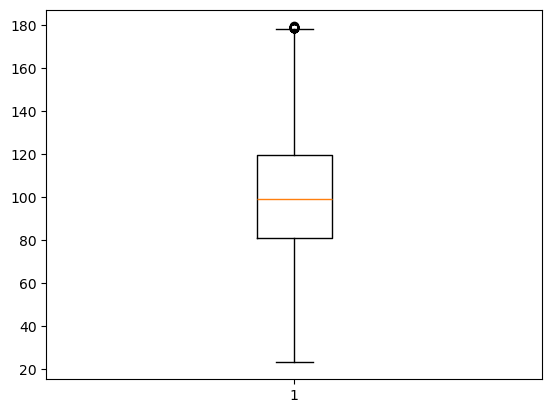

In [51]:
q1=df['average price'].quantile(0.25)
q3=df['average price'].quantile(0.75)

iqr=q3-q1

uw=q3+1.5*iqr
lw=q1-1.5*iqr

plt.boxplot(df["average price"][(df["average price"]>lw)&(df["average price"]<uw)])
plt.show()

In [52]:
df["number of adults"].unique()

array([1, 2, 3, 0, 4], dtype=int64)

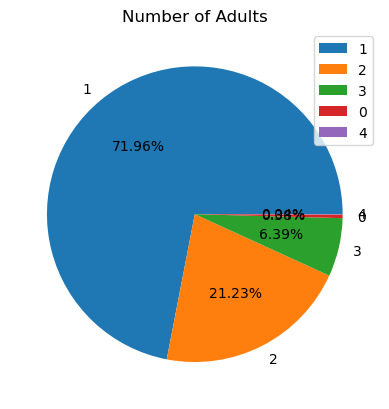

In [53]:
plt.pie(df["number of adults"].value_counts(),autopct="%.2f%%", labels=[1, 2, 3, 0, 4])
plt.legend()
plt.title("Number of Adults")
plt.show()

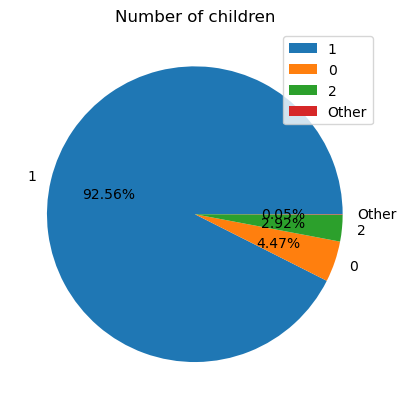

In [54]:
plt.pie(df.loc[df["number of children"]<5, "number of children"].value_counts(),autopct="%.2f%%", labels=[1, 0, 2, "Other"])
plt.title("Number of children")
plt.legend()
plt.show()

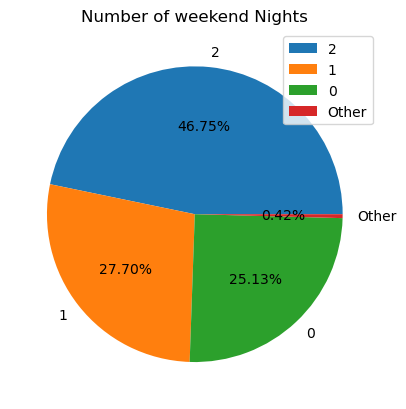

In [55]:
plt.pie(df.loc[df["number of weekend nights"]<4, "number of weekend nights"].value_counts(), autopct="%.2f%%", labels=[2, 1, 0, "Other"])
plt.legend()
plt.title("Number of weekend Nights")
plt.show()

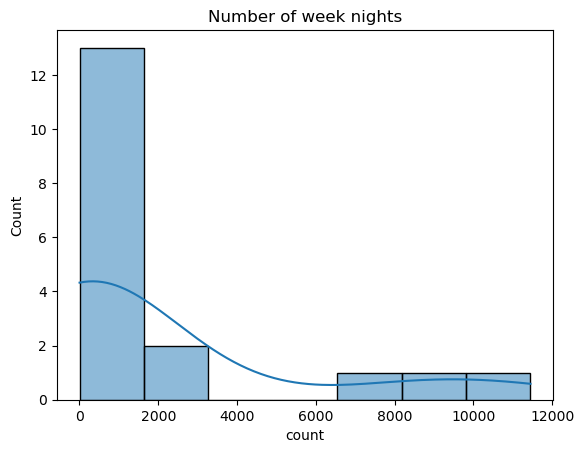

In [56]:
sns.histplot(df["number of week nights"].value_counts(),kde=True)
plt.title("Number of week nights")
plt.show()

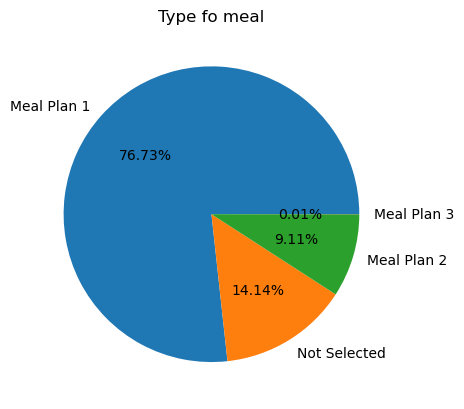

In [57]:
plt.pie(df["type of meal"].value_counts(),autopct="%.2f%%", labels=['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'])
plt.title("Type fo meal")
plt.show()

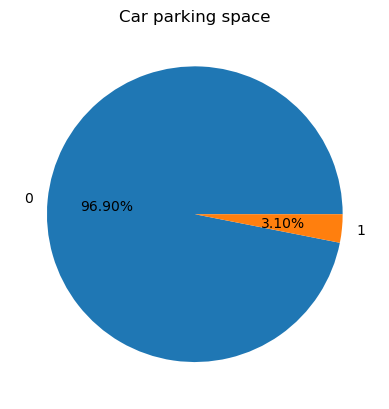

In [58]:
plt.pie(df["car parking space"].value_counts(), autopct="%.2f%%", labels=[0,1])
plt.title("Car parking space")
plt.show()

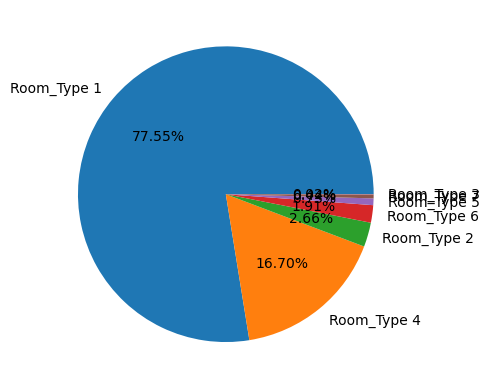

In [59]:
plt.pie(df["room type"].value_counts(), autopct="%.2f%%", labels=['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'])
plt.show()

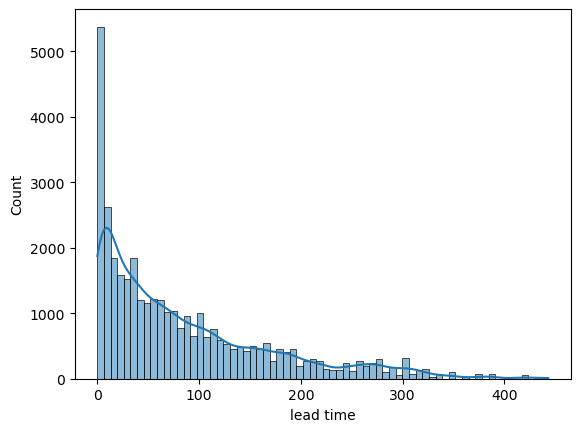

In [60]:
sns.histplot(df["lead time"],kde=True)
plt.show()

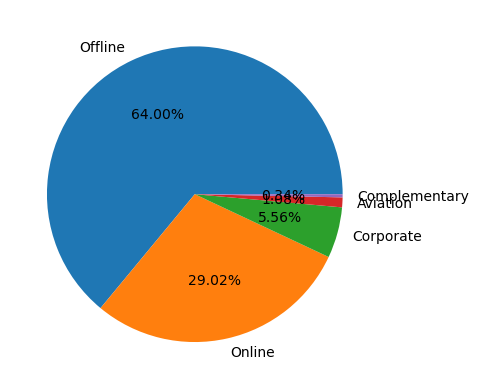

In [61]:
plt.pie(df['market segment type'].value_counts(), autopct="%.2f%%", labels=['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'])
plt.show()

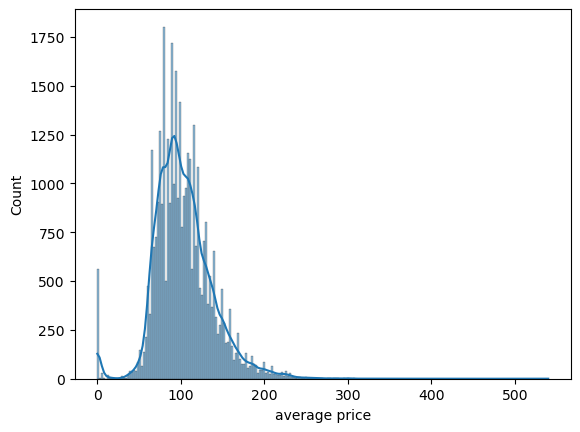

In [62]:
sns.histplot(df["average price"], kde = True)
plt.show()

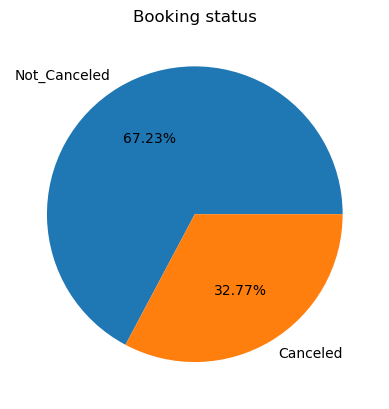

In [63]:
plt.pie(df["booking status"].value_counts(), autopct="%.2f%%", labels=['Not_Canceled', 'Canceled'])
plt.title("Booking status")
plt.show()

Setting up Model

In [64]:
min_val = df['number of adults'].min()
max_val = df['number of adults'].max()
df['number of adults'] = (df['number of adults'] - min_val) / (max_val - min_val)

min_val = df['number of children'].min()
max_val = df['number of children'].max()
df['number of children'] = (df['number of children'] - min_val) / (max_val - min_val)

min_val = df['number of weekend nights'].min()
max_val = df['number of weekend nights'].max()
df['number of weekend nights'] = (df['number of weekend nights'] - min_val) / (max_val - min_val)

min_val = df['number of week nights'].min()
max_val = df['number of week nights'].max()
df['number of week nights'] = (df['number of week nights'] - min_val) / (max_val - min_val)

min_val = df['type of meal'].min()
max_val = df['type of meal'].max()
df['type of meal'] = (df['type of meal'] - min_val) / (max_val - min_val)

min_val = df['room type'].min()
max_val = df['room type'].max()
df['room type'] = (df['room type'] - min_val) / (max_val - min_val)

min_val = df['lead time'].min()
max_val = df['lead time'].max()
df['lead time'] = (df['lead time'] - min_val) / (max_val - min_val)

min_val = df['market segment type'].min()
max_val = df['market segment type'].max()
df['market segment type'] = (df['market segment type'] - min_val) / (max_val - min_val)

min_val = df['average price'].min()
max_val = df['average price'].max()
df['average price'] = (df['average price'] - min_val) / (max_val - min_val)

# min_val = df['date of reservation'].min()
# max_val = df['date of reservation'].max()
# df['date of reservation'] = (df['date of reservation'] - min_val) / (max_val - min_val)

min_val = df['special requests'].min()
max_val = df['special requests'].max()
df['special requests'] = (df['special requests'] - min_val) / (max_val - min_val)

In [65]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status
0,0.25,0.1,0.285714,0.294118,0.0,0,0.0,0.505643,0.75,0,0.162963,0.0,1
1,0.25,0.0,0.142857,0.176471,1.0,0,0.0,0.011287,1.00,0,0.197556,0.2,1
2,0.50,0.1,0.142857,0.176471,0.0,0,0.0,0.002257,1.00,0,0.092593,0.0,0
3,0.25,0.0,0.000000,0.117647,0.0,0,0.0,0.476298,1.00,0,0.185185,0.2,0
4,0.25,0.0,0.142857,0.117647,1.0,0,0.0,0.108352,1.00,0,0.142593,0.0,0


In [66]:
print(len(df[df["booking status"]==0]))
print(len(df[df["booking status"]==1]))

11889
24396


In [67]:
from imblearn.over_sampling import RandomOverSampler

def datasetSampler(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values 
  y=dataframe[dataframe.columns[-1]].values  

  if oversample:                      
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1,1))))    

  return data,x,y

data,X,Y=datasetSampler(df,True)

In [68]:
print(sum(Y==0))
print(sum(Y==1))

24396
24396


In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=4,stratify=Y,test_size=0.1)

In [70]:
#KNN

In [71]:
from sklearn.metrics import classification_report

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [73]:
Y_pred=knn_model.predict(X_test)

In [74]:
Y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [75]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2440
           1       0.87      0.82      0.84      2440

    accuracy                           0.85      4880
   macro avg       0.85      0.85      0.85      4880
weighted avg       0.85      0.85      0.85      4880



In [76]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[2143,  297],
       [ 440, 2000]], dtype=int64)

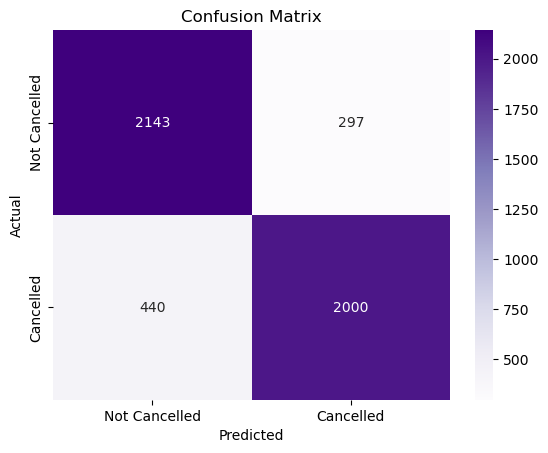

In [77]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()